In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, skew, kurtosis
import statsmodels.api as sm
from scipy.stats import levene

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [ ]:
# Creating date and time features
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday
df['year'] = df['datetime'].dt.year

<Axes: xlabel='temp', ylabel='Count'>

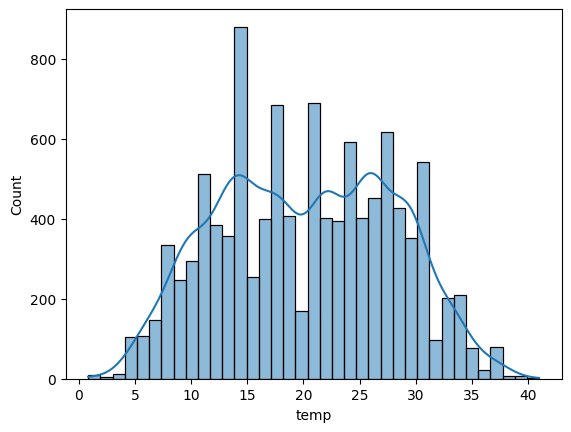

In [ ]:
sns.histplot(df['temp'], kde=True)

<Axes: xlabel='count', ylabel='Count'>

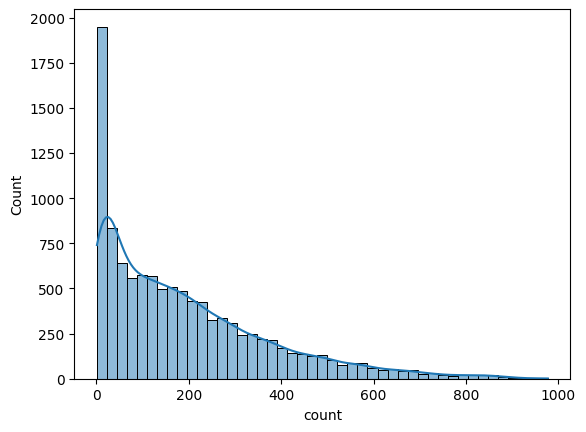

In [ ]:
sns.histplot(df['count'], kde=True)

<Axes: xlabel='weather', ylabel='count'>

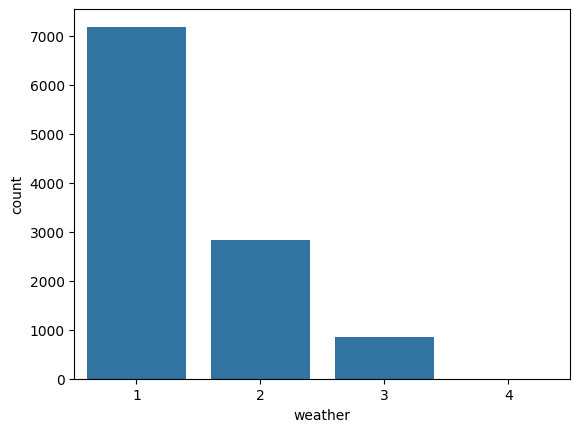

In [ ]:
sns.countplot(x='weather', data=df)

<Axes: xlabel='season', ylabel='count'>

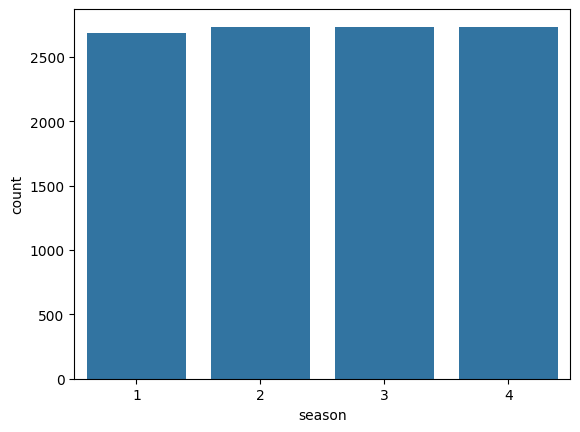

In [ ]:
sns.countplot(x='season', data=df)


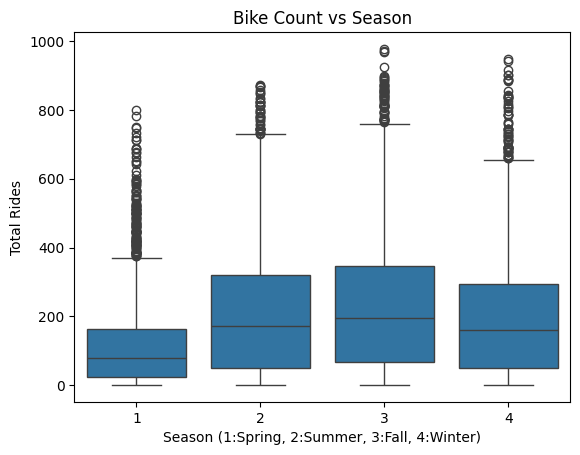

In [ ]:
# Relation between the dependent and independent variable
sns.boxplot(x='season', y='count', data=df)
plt.title('Bike Count vs Season')
plt.xlabel('Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Total Rides')
plt.show()


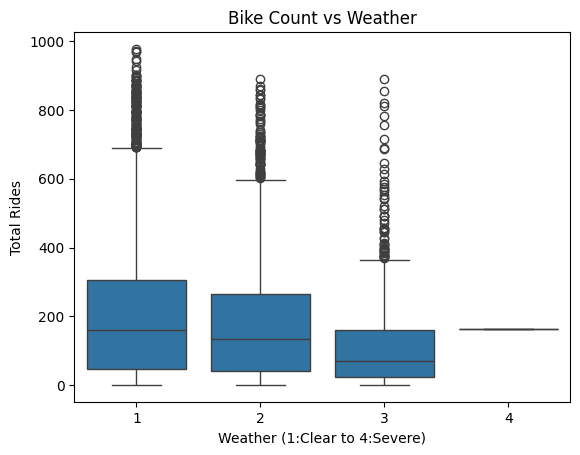

In [ ]:
sns.boxplot(x='weather', y='count', data=df)
plt.title('Bike Count vs Weather')
plt.xlabel('Weather (1:Clear to 4:Severe)')
plt.ylabel('Total Rides')
plt.show()


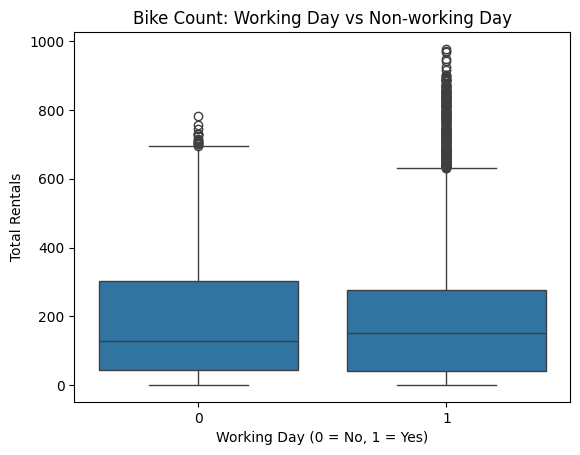

In [ ]:
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Bike Count: Working Day vs Non-working Day')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Total Rentals')
plt.show()


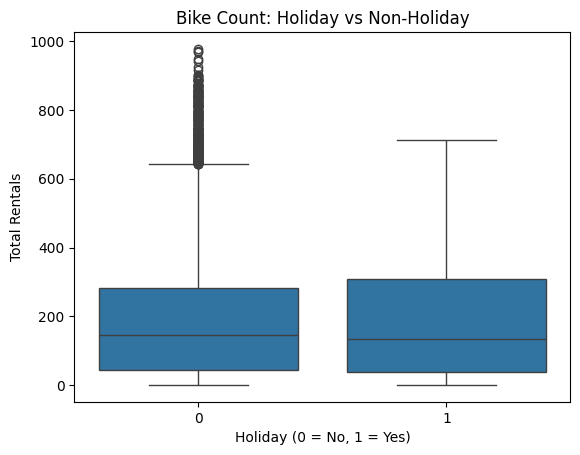

In [ ]:
sns.boxplot(x='holiday', y='count', data=df)
plt.title('Bike Count: Holiday vs Non-Holiday')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Total Rentals')
plt.show()


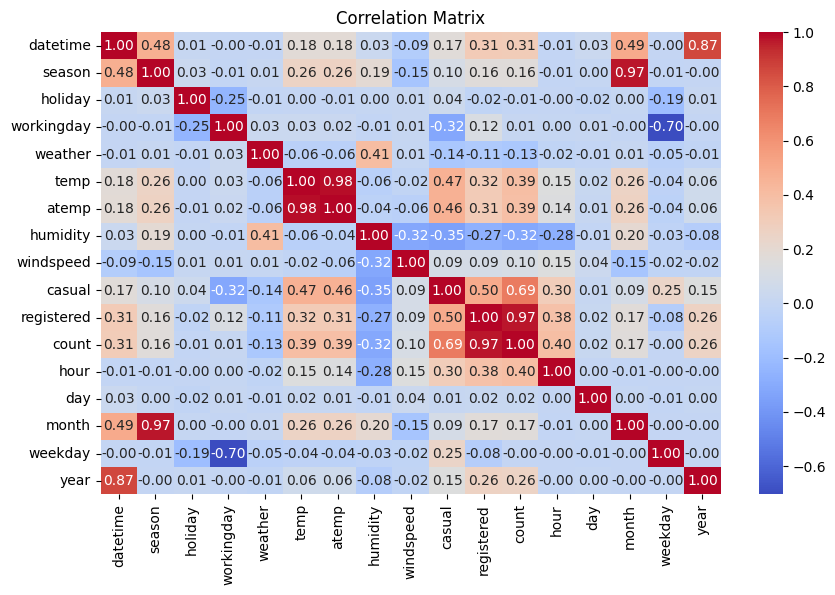

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
'''  Test to check whether:
Working Day has effect on number of electric cycles rented :two sample t test
h0: Working Day has no effect on number of electric cycles rented
h1: Working Day has effect on number of electric cycles rented
'''
working = df[df['workingday'] == 1]['count']
non_working = df[df['workingday'] == 0]['count']
t_stat, p_value = ttest_ind(working, non_working, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 1.2362580418223226
P-value: 0.21640312280695098


In [ ]:
# Since the p-value is greater than 0.05, we fail to reject the null hypothesis. therefore Working Day has no effect on number of electric cycles rented.
# Rental strategy and operations need not vary drastically between working and non-working days.

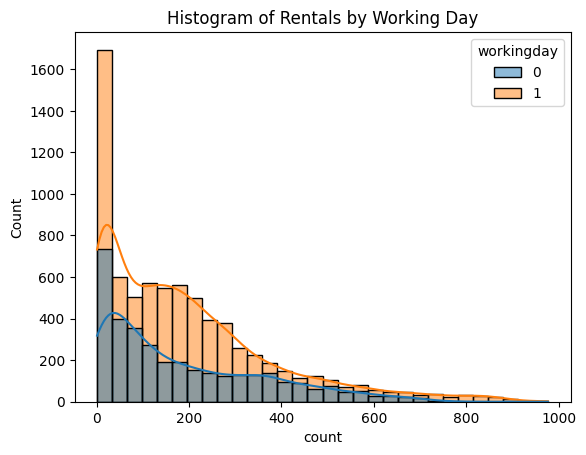

In [ ]:
sns.histplot(data=df, x='count', hue='workingday', kde=True, bins=30)
plt.title("Histogram of Rentals by Working Day")
plt.show()

In [ ]:
group1 = df[df['workingday'] == 1]['count']
group0 = df[df['workingday'] == 0]['count']

stat, p = levene(group1, group0)
print(f"Levene’s Test: Statistic = {stat}, p-value = {p}")

Levene’s Test: Statistic = 0.004972848886504472, p-value = 0.9437823280916695


In [ ]:
from scipy.stats import shapiro

for label in [0, 1]:
    stat, p = shapiro(df[df['workingday'] == label]['count'])
    print(f"Shapiro Test for workingday = {label}: Statistic = {stat}, p-value = {p}")

Shapiro Test for workingday = 0: Statistic = 0.885211755076074, p-value = 4.4728547627911074e-45
Shapiro Test for workingday = 1: Statistic = 0.8702545795617624, p-value = 2.2521124830019574e-61


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
'''  Test to check whether:
No. of cycles rented similar or different in different seasons : One Way Anova test
h0: No. of cycles rented similar in different seasons
h1: No. of cycles rented different in different seasons
'''
spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall   = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']
f_stat, p_value = f_oneway(spring, summer, fall, winter)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 236.94671081032106
P-value: 6.164843386499654e-149


In [ ]:
# Since the p-value is less than 0.05 we Reject the null hypothesis here therefore The number of cycles rented varies significantly across seasons.

In [ ]:
'''  Test to check whether:
No. of cycles rented similar or different in different weather : One way Anova test
h0: No. of cycles rented similar in different weather
h1: No. of cycles rented different in different weather
'''
weather_1 = df[df['weather'] == 1]['count']
weather_2 = df[df['weather'] == 2]['count']
weather_3 = df[df['weather'] == 3]['count']
weather_4 = df[df['weather'] == 4]['count']

f_stat, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42


In [ ]:
# Since the p-value is less than 0.05 we Reject the null hypothesis here therefore The number of cycles rented varies significantly across
# different weather conditions.

In [ ]:
'''  Test to check whether:
Weather is dependent on season : Chi Square Test
h0: Weather is independent of season
h1: Weather is dependent of season
'''
contingency_table = pd.crosstab(df['season'], df['weather'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square Statistic: 49.158655596893624
P-value: 1.549925073686492e-07


In [ ]:
# As p valuse is less than 0.05
# Conclusion: There is a statistically significant relationship between weather and season — they are dependent.

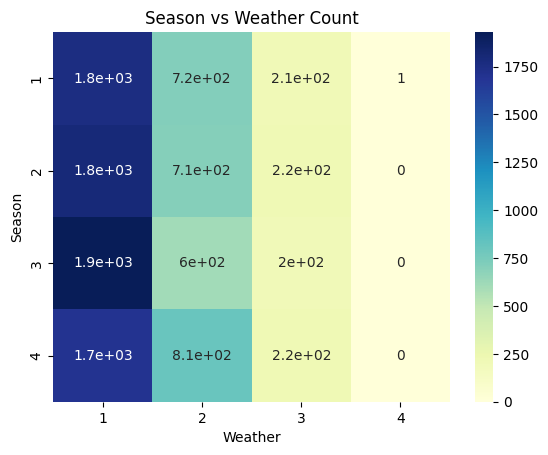

In [ ]:
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title("Season vs Weather Count")
plt.xlabel("Weather")
plt.ylabel("Season")
plt.show()

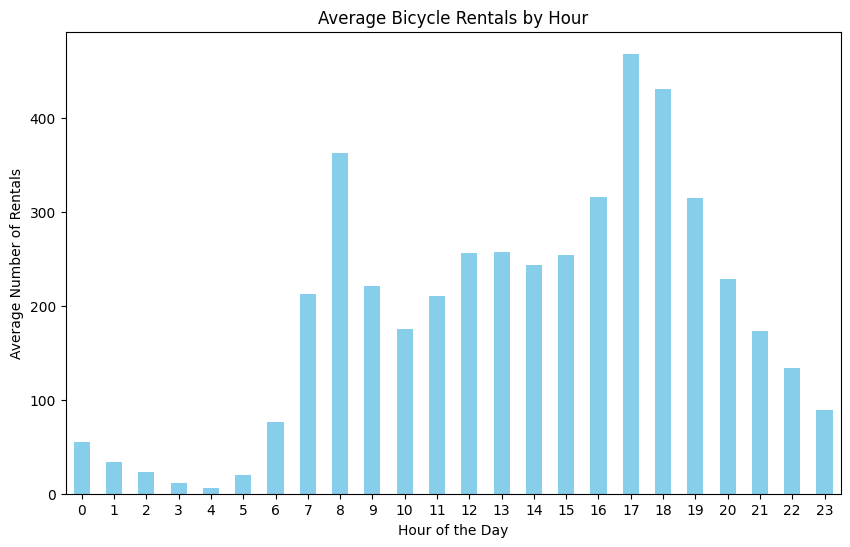

In [ ]:

df['hour'] = pd.to_datetime(df['datetime']).dt.hour

# Group by hour and calculate average rentals
hourly_rentals = df.groupby('hour')['count'].mean()

# Plotting the hourly rentals
plt.figure(figsize=(10,6))
hourly_rentals.plot(kind='bar', color='skyblue')
plt.title('Average Bicycle Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rentals')
plt.xticks(rotation=0)
plt.show()


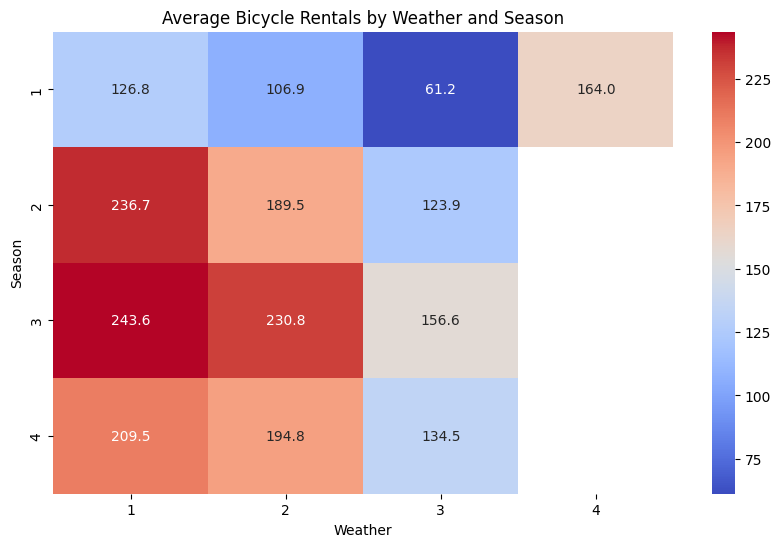

In [ ]:
# Group by season and weather, calculate average rentals
weather_season_rentals = df.groupby(['season', 'weather'])['count'].mean().unstack()

# using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(weather_season_rentals, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Bicycle Rentals by Weather and Season')
plt.xlabel('Weather')
plt.ylabel('Season')
plt.show()

<Figure size 1000x600 with 0 Axes>

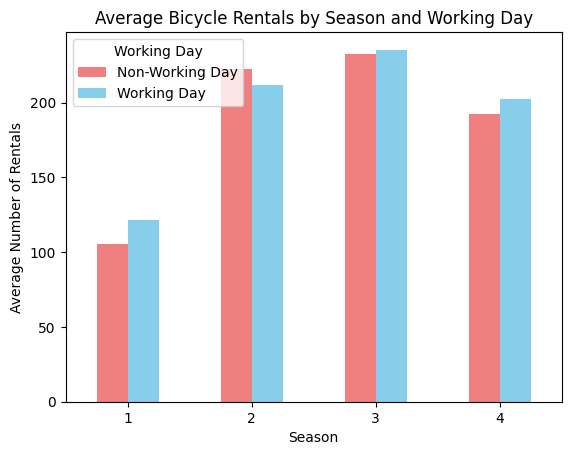

In [ ]:

season_workingday_rentals = df.groupby(['season', 'workingday'])['count'].mean().unstack()
plt.figure(figsize=(10,6))
season_workingday_rentals.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Average Bicycle Rentals by Season and Working Day')
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')
plt.xticks(rotation=0)
plt.legend(title='Working Day', labels=['Non-Working Day', 'Working Day'])
plt.show()

In [ ]:
'''
      There is no statistically significant difference in the number of cycles rented between working and non-working days.
      The working day status doesn't seem to influence rental patterns. However, other factors such as weather, season, and
      time of day have a stronger impact.
      This implies that bike rental demand is fairly consistent, regardless of whether it's a working or non working day.

      Different seasons show varying demand for electric cycles, with Fall (Season 3) having the highest
      rental numbers due to pleasant weather conditions.

      There are strong interactions between weather and season, particularly clear weather during
      fall (Season 3), which is likely when the demand for rentals is highest.
Recommendation:
      Do not limit promotions to weekdays—consider campaigns for weekends and holidays as well.
      Keep consistent availability of bicycles and support staff on all days, since demand doesn’t vary significantly.
      Increasing availability of bikes during Fall with favorable weather conditions.

    Focus on Seasonal Adjustments:
      Peak Season: Based on the data, Fall (Season 3) with clear weather (Weather 1)
      has the highest demand for bike rentals.
      It’s recommended to optimize bike availability during this season,
      ensuring sufficient fleet size in areas where weather conditions are likely to be clear.

      Conversely, during Winter (Season 4) with heavy rain or snow (Weather 4), bike rentals are significantly lower.
      During such periods, you could reduce fleet sizes or focus on maintenance and upgrades.

     Marketing campaigns could focus on promoting bike rentals during good weather conditions,
     highlighting the convenience of biking in pleasant weather.

     On days with rain (Weather 3) or snow (Weather 4), bike rentals decrease.
     Introduce weather-related discounts (e.g., rainy day discounts) to encourage
     rentals during off-peak weather or offer other incentives to make biking in such weather more attractive.


'''